# Predicting whether a customer will issue a card or not

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone will issue a card based on his records.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given cutomer's parameters, can we predict whether or not they are gonna issue  a card?

## 2. Data

Randomly created data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a customer is gonna issue a card, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. province - where he/she lives
    * 0: Baghdad
    * 1: Karabala
    * 2: Maysan
    * 3: Najaf
    * 4: Diyala
    * 5: Karikok
    * 6: Naasrya
   
4. page - has a facebook page (1 has - 0 non)
5. employee - is he/she an emplyee
6. brand - is he/she a customer of another brand 
7. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [82]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("default")
#plt.rcParams.update({"figure.figsize" : (12, 8),
 #                    "axes.facecolor" : "white",
  #                   "axes.edgecolor":  "black"})
#plt.grid('false')
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data 

In [20]:
df = pd.read_csv("customers_dataset.csv")
df.shape # (rows, columns)

(303, 7)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [21]:
df.head()

,age,sex,province,page,employee,Brand,target
0,20,1,0,1,1,1,1
1,35,1,0,1,1,1,1
2,35,1,0,1,0,1,1
3,35,1,0,1,0,1,1
4,20,1,0,1,0,1,1


In [22]:
df.tail()

,age,sex,province,page,employee,Brand,target
298,35,1,0,0,0,0,0
299,35,1,0,1,1,1,0
300,35,1,0,1,0,1,0
301,35,0,0,1,1,0,0
302,35,1,0,0,1,1,0


In [23]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

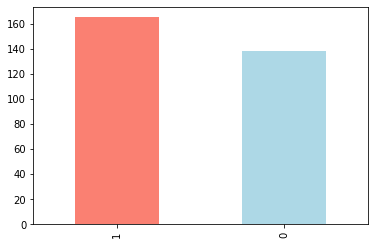

In [24]:
    df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
    

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   province  303 non-null    int64
 3   page      303 non-null    int64
 4   employee  303 non-null    int64
 5   Brand     303 non-null    int64
 6   target    303 non-null    int64
dtypes: int64(7)
memory usage: 16.7 KB


In [26]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
province    0
page        0
employee    0
Brand       0
target      0
dtype: int64

In [27]:
df.describe()

,age,sex,province,page,employee,Brand,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,24.983498,0.933993,0.970297,0.603960,0.478548,0.541254,0.544554
std,6.923163,0.248704,1.566128,0.489882,0.500366,0.499120,0.498835
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,35.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,35.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


### Target  Frequency according to Sex 

In [28]:
df.sex.value_counts()

1    283
0     20
Name: sex, dtype: int64

In [29]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,10,128
1,10,155


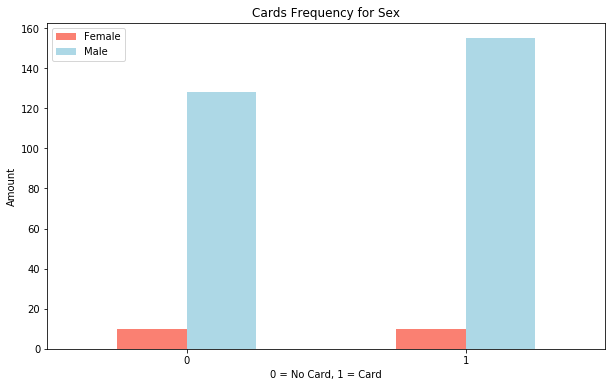

In [33]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Cards Frequency for Sex")
plt.xlabel("0 = No Card, 1 = Card")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Page for Cards

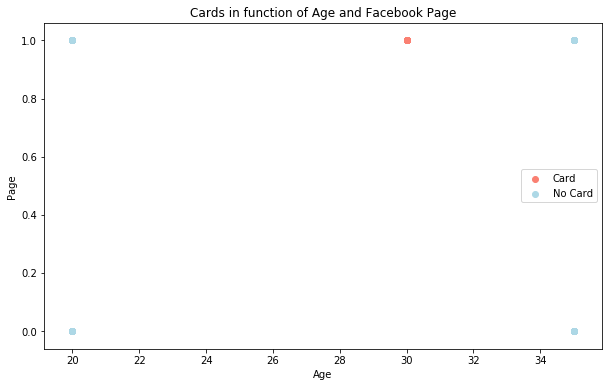

In [34]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.page[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.page[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Cards in function of Age and Facebook Page")
plt.xlabel("Age")
plt.ylabel("Page")
plt.legend(["Card", "No Card"]);

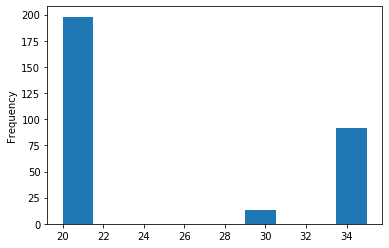

In [35]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Cards Frequency per Province

3. Province -
    * 0: Baghdad
    * 1: Karabala
    * 2: Maysan
    * 3: Najaf
    * 4: Diyala
    * 5: Karikok
    * 6: Naasrya

In [36]:
pd.crosstab(df.province, df.target)

target,0,1
province,,
0,87,105
1,9,24
2,0,21
3,16,15
4,12,0
5,6,0
6,8,0


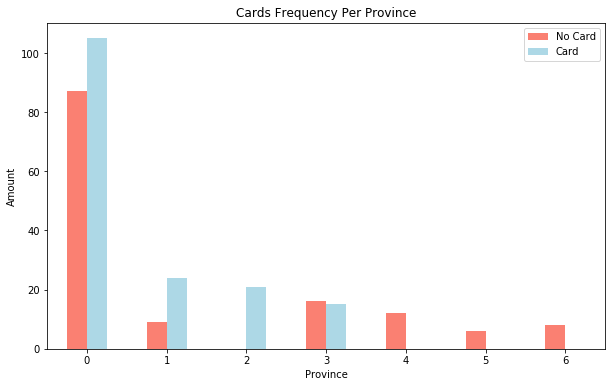

In [37]:
# Make the crosstab more visual
pd.crosstab(df.province, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Cards Frequency Per Province")
plt.xlabel("Province")
plt.ylabel("Amount")
plt.legend(["No Card", "Card"])
plt.xticks(rotation=0);

In [38]:
df.head()

,age,sex,province,page,employee,Brand,target
0,20,1,0,1,1,1,1
1,35,1,0,1,1,1,1
2,35,1,0,1,0,1,1
3,35,1,0,1,0,1,1
4,20,1,0,1,0,1,1


In [39]:
# Make a correlation matrix
df.corr()

,age,sex,province,page,employee,Brand,target
age,1.000000,-0.029481,0.102262,-0.060513,-0.026389,-0.050111,-0.074094
sex,-0.029481,1.000000,0.054458,-0.106559,0.041801,-0.031341,0.023783
province,0.102262,0.054458,1.000000,0.014828,0.056228,0.046051,-0.208105
page,-0.060513,-0.106559,0.014828,1.000000,0.654169,0.744164,0.262149
employee,-0.026389,0.041801,0.056228,0.654169,1.000000,0.590253,0.053590
Brand,-0.050111,-0.031341,0.046051,0.744164,0.590253,1.000000,0.128912
target,-0.074094,0.023783,-0.208105,0.262149,0.053590,0.128912,1.000000


(7.5, -0.5)

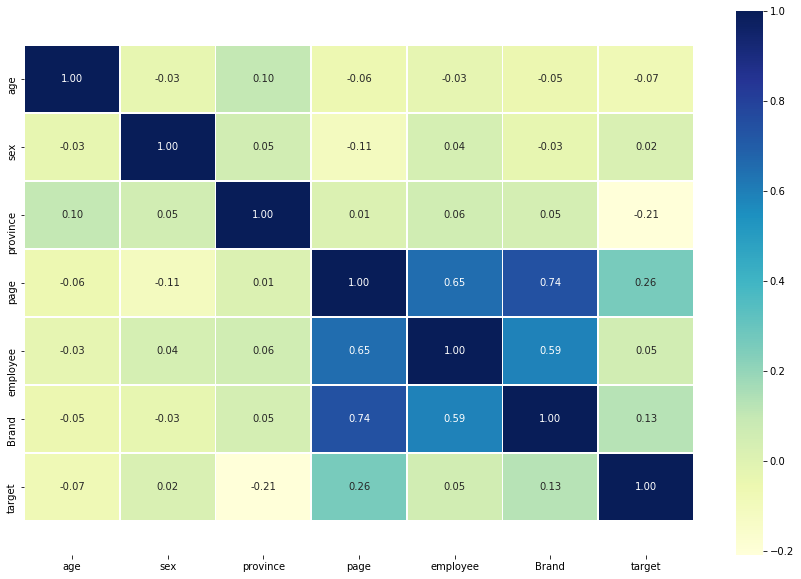

In [40]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling 

In [41]:
df.head()

,age,sex,province,page,employee,Brand,target
0,20,1,0,1,1,1,1
1,35,1,0,1,1,1,1
2,35,1,0,1,0,1,1
3,35,1,0,1,0,1,1
4,20,1,0,1,0,1,1


In [42]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [43]:
X

,age,sex,province,page,employee,Brand
0,20,1,0,1,1,1
1,35,1,0,1,1,1
2,35,1,0,1,0,1
3,35,1,0,1,0,1
4,20,1,0,1,0,1
...,...,...,...,...,...,...
298,35,1,0,0,0,0
299,35,1,0,1,1,1
300,35,1,0,1,0,1
301,35,0,0,1,1,0


In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [45]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [46]:
X_train

,age,sex,province,page,employee,Brand
132,20,1,1,0,0,0
202,20,1,0,0,0,0
196,35,1,4,1,1,1
75,20,1,3,1,0,1
176,35,1,0,0,0,0
...,...,...,...,...,...,...
188,35,1,6,0,0,0
71,20,1,0,1,1,1
106,20,1,0,1,1,1
270,20,1,0,1,1,1


In [47]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [48]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(n_neighbors=9),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [49]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.5409836065573771,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.639344262295082}

### Model Comparison

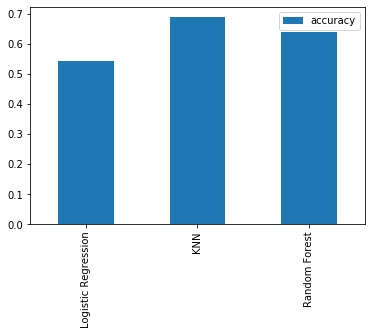

In [50]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [51]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [52]:
train_scores

[0.731404958677686,
 0.7024793388429752,
 0.7396694214876033,
 0.71900826446281,
 0.7066115702479339,
 0.743801652892562,
 0.7272727272727273,
 0.7396694214876033,
 0.7272727272727273,
 0.71900826446281,
 0.71900826446281,
 0.7355371900826446,
 0.71900826446281,
 0.71900826446281,
 0.7231404958677686,
 0.6942148760330579,
 0.6900826446280992,
 0.6859504132231405,
 0.6942148760330579,
 0.6942148760330579]

In [53]:
test_scores

[0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.5737704918032787,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6065573770491803,
 0.6721311475409836,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327]

Maximum KNN score on the test data: 68.85%


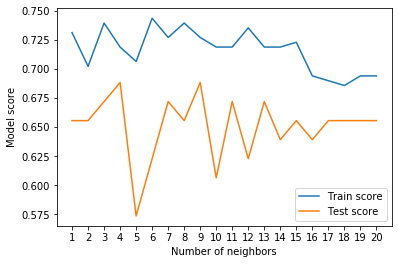

In [54]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [55]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [56]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.004832930238571752}

In [58]:
rs_log_reg.score(X_test, y_test)

0.47540983606557374

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [59]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [60]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [61]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.6229508196721312

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [62]:
# Different hyperparameters for our LogisticRegression model
#log_reg_grid = {"C": np.logspace(-4, 4, 30),
                #"solver": ["liblinear"]}
rf1_grid ={"n_estimators": np.arange(500, 5000, 500),
           "max_depth": [None],
           "min_samples_split": np.arange(2, 6, 2),
           "min_samples_leaf": np.arange(2, 6, 2)}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf1_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  9.6min finished


In [63]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 4000}

In [64]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)


0.639344262295082

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [65]:
# Make predictions with tuned model
y_preds = knn.predict(X_test)

In [66]:
y_preds

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [67]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

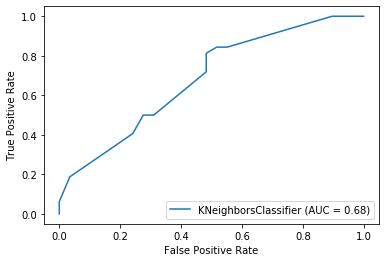

In [68]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(knn, X_test, y_test)

In [69]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[15 14]
 [ 7 25]]


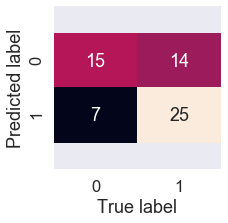

In [70]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [71]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59        29
           1       0.64      0.78      0.70        32

    accuracy                           0.66        61
   macro avg       0.66      0.65      0.65        61
weighted avg       0.66      0.66      0.65        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [72]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [75]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators= 4000,
 min_samples_split= 16,
 min_samples_leaf= 4,
 max_depth =10)


In [76]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.73770492, 0.80327869, 0.44262295, 0.6       , 0.63333333])

In [77]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6433879781420765

In [78]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.6360646828731935

In [79]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.696969696969697

In [80]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.6564550264550264

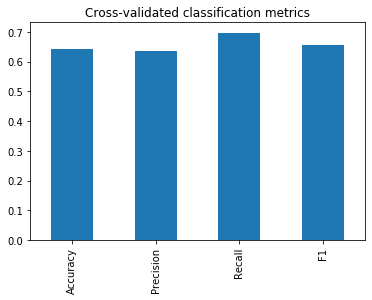

In [83]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [ ]:
# Fit an instance of LogisticRegression
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators= 710,
 min_samples_split= 16,
 min_samples_leaf= 3,
 max_depth =10)

clf.fit(X_train, y_train);

## feature_importances
_ndarray of shape (n_features,)
Return the feature importances (the higher, the more important the feature).

In [ ]:
# Check n_features
clf.feature_importances_

In [14]:
df.head()

,age,sex,province,page,employee,Brand,target
0,20,1,0,1,1,1,1
1,35,1,0,1,1,1,1
2,35,1,0,1,0,1,1
3,35,1,0,1,0,1,1
4,20,1,0,1,0,1,1


In [15]:
# Match coef's of features to columns
feature_dict = dict(zip(df.drop("target", axis=1), list(clf.feature_importances_)))
feature_dict

NameError: name 'clf' is not defined

In [16]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

NameError: name 'feature_dict' is not defined

In [17]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["province"], df["target"])

target,0,1
province,,
0,87,105
1,9,24
2,0,21
3,16,15
4,12,0
5,6,0
6,8,0


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?